SALES DATA ANALYSIS


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving online_retail.csv to online_retail.csv


In [6]:
# Read the dataset
data = pd.read_csv('/content/online_retail.csv')

In [7]:
# Explore the data
print(data.head())
print(data.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------------

In [14]:
# Remove rows with missing values in key columns
data = data.dropna(subset=['Description', 'Quantity', 'UnitPrice', 'CustomerID'])

In [15]:
# Remove negative quantities (e.g., returns)
data = data[data['Quantity'] > 0]

In [17]:
# Calculate total revenue per transaction
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']

In [18]:
# cleaned Data
print(data.head())
print(data.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34  
<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 colu

In [22]:
# Analyze total quantity sold by product (using Description)
sales_by_product = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

In [23]:
# Analyze total revenue by product
revenue_by_product = data.groupby('StockCode')['TotalRevenue'].sum().sort_values(ascending=False)

In [24]:
# Display top 10 products by quantity and revenue
print("Top 10 Products by Quantity Sold:")
print(sales_by_product.head(10))
print("\nTop 10 Products by Revenue:")
print(revenue_by_product.head(10))

Top 10 Products by Quantity Sold:
StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

Top 10 Products by Revenue:
StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: TotalRevenue, dtype: float64


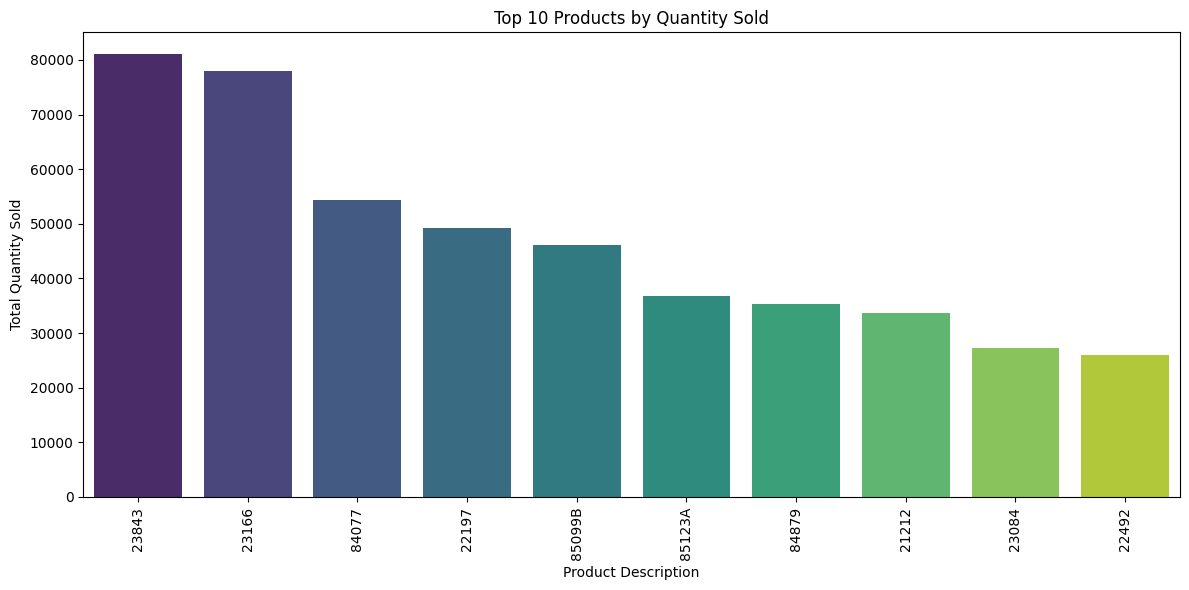

In [30]:
# Visualize top 10 products by quantity
top_10_products = sales_by_product.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, hue=top_10_products.index, palette='viridis', legend=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalRevenue, dtype: float64


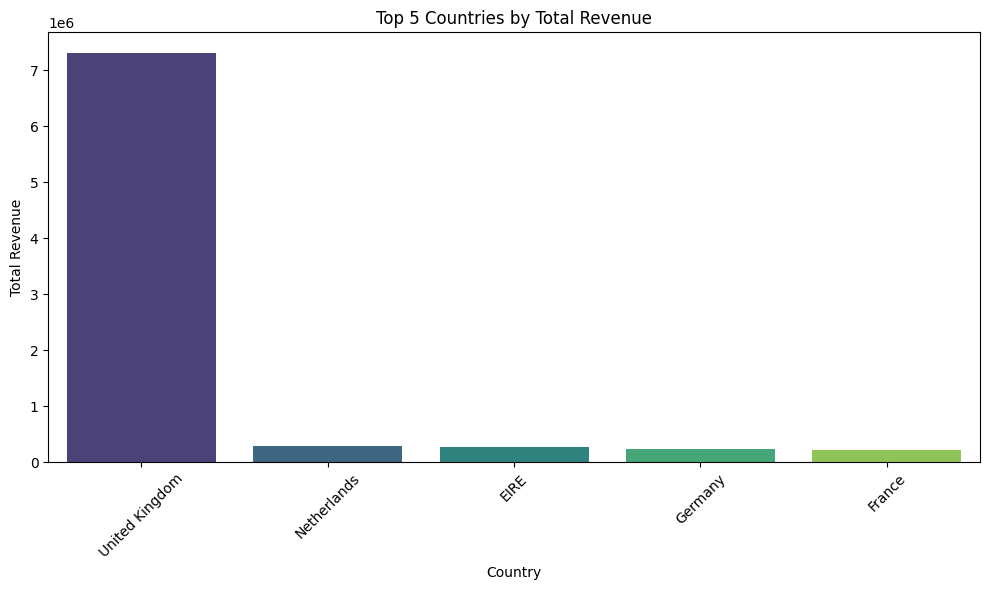

In [31]:
# Sales by Country
sales_by_country = data.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

# Select top 5 countries
top_5_countries = sales_by_country.head(5)

print(sales_by_country.head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, hue=top_5_countries.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Top 5 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()